In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from numpy.linalg import matrix_rank

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy.linalg import matrix_rank

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import math

import matplotlib.pyplot as plt
import seaborn as sns

"""
! pip list
"""

'\n! pip list\n'

In [2]:
df = pd.read_csv('./../datasets/Data D4H19 - AHT Sept 2018.csv', low_memory=False)

In [3]:
df.shape

(55434, 62)

In [4]:
df.head(15)

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
1,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
2,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
3,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
4,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
5,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
6,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
7,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
8,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1
9,2002,Case Management,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,Unknown,-99,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55434 entries, 0 to 55433
Data columns (total 62 columns):
yearOfRegistration                        55434 non-null int64
Datasource                                55434 non-null object
gender                                    55434 non-null object
ageBroad                                  55434 non-null object
majorityStatus                            55434 non-null object
majorityStatusAtExploit                   55434 non-null object
majorityEntry                             55434 non-null object
citizenship                               55434 non-null object
meansOfControlDebtBondage                 55434 non-null int64
meansOfControlTakesEarnings               55434 non-null int64
meansOfControlRestrictsFinancialAccess    55434 non-null int64
meansOfControlThreats                     55434 non-null int64
meansOfControlPsychologicalAbuse          55434 non-null int64
meansOfControlPhysicalAbuse               55434 non-null int64
me

In [6]:
df['yearOfRegistration'].value_counts(dropna=False)

2016    18893
2017    10405
2015     6804
2014     3142
2013     2142
2011     1823
2005     1617
2006     1534
2010     1521
2007     1469
2012     1395
2018     1270
2002     1129
2009      833
2008      828
2003      379
2004      250
Name: yearOfRegistration, dtype: int64

In [7]:
df['yearOfRegistration'].value_counts(dropna=False).sort_index()

2002     1129
2003      379
2004      250
2005     1617
2006     1534
2007     1469
2008      828
2009      833
2010     1521
2011     1823
2012     1395
2013     2142
2014     3142
2015     6804
2016    18893
2017    10405
2018     1270
Name: yearOfRegistration, dtype: int64

In [8]:
df['ageBroad'].value_counts(dropna=False).sort_index()

-99        12480
0--8        1739
18--20      4141
21--23      4013
24--26      3311
27--29      2496
30--38      6706
39--47      2679
48+         1502
9--17       7634
Unknown     8733
Name: ageBroad, dtype: int64

In [104]:
for c in df.columns:
    print("\n------------ %s:-------------" % c)
    print(df[c].value_counts().sort_index())


------------ yearOfRegistration:-------------
2002     1129
2003      379
2004      250
2005     1617
2006     1534
2007     1469
2008      828
2009      833
2010     1521
2011     1823
2012     1395
2013     2142
2014     3142
2015     6804
2016    18893
2017    10405
2018     1270
Name: yearOfRegistration, dtype: int64

------------ Datasource:-------------
Case Management    38290
Hotline            17144
Name: Datasource, dtype: int64

------------ gender:-------------
-99          110
Female     40351
Male       14444
Unknown      529
Name: gender, dtype: int64

------------ ageBroad:-------------
-99        12480
0--8        1739
18--20      4141
21--23      4013
24--26      3311
27--29      2496
30--38      6706
39--47      2679
48+         1502
9--17       7634
Unknown     8733
Name: ageBroad, dtype: int64

------------ majorityStatus:-------------
-99        12480
Adult      29569
Minor      10542
Unknown     2843
Name: majorityStatus, dtype: int64

------------ majorityStatu

In [10]:
df['citizenship'].value_counts(dropna=False).head(10)

ZZ    12318
PH    11433
UA     7793
MD     7499
US     4159
KH     1949
ID     1947
BY     1517
MM     1281
RO      685
Name: citizenship, dtype: int64

In [11]:
df['CountryOfExploitation'].value_counts(dropna=False).head(10)

US     16956
-99    11738
MD      5698
UA      5308
RU      2787
PH      1988
ID      1776
KH       983
MY       907
GH       545
Name: CountryOfExploitation, dtype: int64

In [105]:
for col in df.columns:
    print(df[col].isnull().value_counts())

False    55434
Name: yearOfRegistration, dtype: int64
False    55434
Name: Datasource, dtype: int64
False    55434
Name: gender, dtype: int64
False    55434
Name: ageBroad, dtype: int64
False    55434
Name: majorityStatus, dtype: int64
False    55434
Name: majorityStatusAtExploit, dtype: int64
False    55434
Name: majorityEntry, dtype: int64
False    55434
Name: citizenship, dtype: int64
False    55434
Name: meansOfControlDebtBondage, dtype: int64
False    55434
Name: meansOfControlTakesEarnings, dtype: int64
False    55434
Name: meansOfControlRestrictsFinancialAccess, dtype: int64
False    55434
Name: meansOfControlThreats, dtype: int64
False    55434
Name: meansOfControlPsychologicalAbuse, dtype: int64
False    55434
Name: meansOfControlPhysicalAbuse, dtype: int64
False    55434
Name: meansOfControlSexualAbuse, dtype: int64
False    55434
Name: meansOfControlFalsePromises, dtype: int64
False    55434
Name: meansOfControlPsychoactiveSubstances, dtype: int64
False    55434
Name: meansO

## Check for Multicollinearity (via Variance Inflation Factor - VIF)

In [12]:
X = df.drop(df.select_dtypes(['object']), axis=1)

In [13]:
X.head()

,yearOfRegistration,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,...,typeOfSexProstitution,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1


In [14]:
X.shape

(55434, 49)

In [15]:
for i, col in enumerate(X.columns):
    print('VIF {}: {}'.format(col,variance_inflation_factor(X.values,i)))
    
## High VIF (5-10 or higher) indicates high correlation between column and one or more column(s)

VIF yearOfRegistration: 782.6320287712185
VIF meansOfControlDebtBondage: 47.333553237843454
VIF meansOfControlTakesEarnings: 35.82503097367307
VIF meansOfControlRestrictsFinancialAccess: 319.13802092416984
VIF meansOfControlThreats: 21.040990956211896
VIF meansOfControlPsychologicalAbuse: 26.858690254808625
VIF meansOfControlPhysicalAbuse: 21.08395690854809
VIF meansOfControlSexualAbuse: 41.070053717918235
VIF meansOfControlFalsePromises: 45.01360357402888
VIF meansOfControlPsychoactiveSubstances: 28.108011451068684
VIF meansOfControlRestrictsMovement: 19.367587579271877
VIF meansOfControlRestrictsMedicalCare: 79.75818318018365
VIF meansOfControlExcessiveWorkingHours: 75.57253887602764
VIF meansOfControlUsesChildren: 337.60152096864863
VIF meansOfControlThreatOfLawEnforcement: 67.27183208592834
VIF meansOfControlWithholdsNecessities: 45.03525286314747
VIF meansOfControlWithholdsDocuments: 56.1345913730158
VIF meansOfControlOther: 28.207065689771856
VIF meansOfControlNotSpecified: 5.200

C:\Users\ekvtjdx\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF isForcedMilitary: inf
VIF isOrganRemoval: inf
VIF typeOfLabourAgriculture: 821.0549500208618
VIF typeOfLabourAquafarming: 2332.073572875961
VIF typeOfLabourBegging: 1778875.5359310552
VIF typeOfLabourConstruction: 172.14432191637633
VIF typeOfLabourDomesticWork: 27.762974192367054
VIF typeOfLabourHospitality: 351.26799065684287
VIF typeOfLabourIllicitActivities: 5044309.221434503
VIF typeOfLabourManufacturing: 293.76995764679896
VIF typeOfLabourMiningOrDrilling: inf
VIF typeOfLabourPeddling: 5043423.190077324
VIF typeOfLabourTransportation: inf
VIF typeOfLabourOther: 371.5350341423633
VIF typeOfLabourNotSpecified: 75.87267147579524
VIF typeOfSexProstitution: 35.67969425909864
VIF typeOfSexPornography: 2575778.3260158524
VIF typeOfSexRemoteInteractiveServices: 2575905.9285451598
VIF typeOfSexPrivateSexualServices: 199.99344915582583
VIF isAbduction: 26.48792475234421
VIF recruiterRelationIntimatePartner: 86032.9730538612
VIF recruiterRelationFriend: 67703.80939813177
VIF recruiterRe

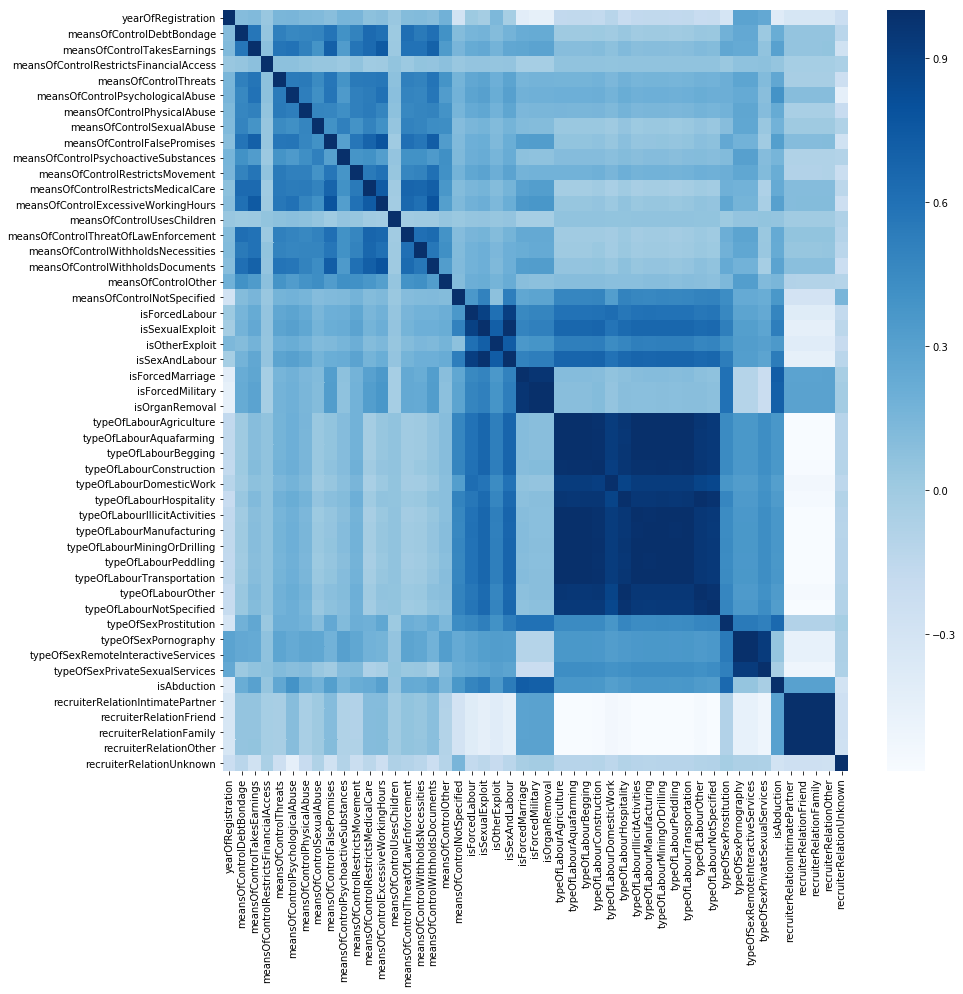

In [106]:
# calculate the correlation matrix
corr = X.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, ax=ax, xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = 'Blues')
plt.show()

In [17]:
corr_abs = corr.abs()

s = corr_abs.unstack()
corr_sort = s.sort_values(kind="quicksort", ascending = False)

print(corr_sort.head())

recruiterRelationUnknown      recruiterRelationUnknown      1.0
typeOfLabourMiningOrDrilling  typeOfLabourTransportation    1.0
isOrganRemoval                isOrganRemoval                1.0
typeOfLabourAgriculture       typeOfLabourAgriculture       1.0
typeOfLabourAquafarming       typeOfLabourAquafarming       1.0
dtype: float64


In [18]:
corr_sort.shape

(2401,)

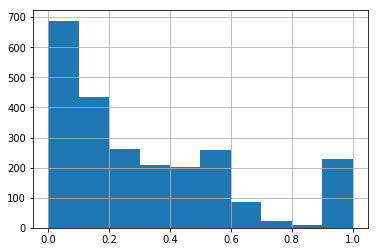

In [19]:
corr_sort.hist()

In [20]:
df_corr_sort = corr_sort.reset_index()

In [21]:
df_corr_sort.rename(columns={'level_0': 'feature1', 'level_1': 'feature2', 0: 'corr_val'}, inplace=True)

In [22]:
df_corr_sort.head()

,feature1,feature2,corr_val
0,recruiterRelationUnknown,recruiterRelationUnknown,1.0
1,typeOfLabourMiningOrDrilling,typeOfLabourTransportation,1.0
2,isOrganRemoval,isOrganRemoval,1.0
3,typeOfLabourAgriculture,typeOfLabourAgriculture,1.0
4,typeOfLabourAquafarming,typeOfLabourAquafarming,1.0


In [23]:
df_corr_sort.shape

(2401, 3)

In [24]:
df_corr_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 3 columns):
feature1    2401 non-null object
feature2    2401 non-null object
corr_val    2401 non-null float64
dtypes: float64(1), object(2)
memory usage: 56.4+ KB


In [25]:
df_corr_sort_top = df_corr_sort[(df_corr_sort.corr_val < .97)  & (df_corr_sort.corr_val > 0.7)]

In [34]:
df_corr_sort_top.head(10)

,feature1,feature2,corr_val
145,isOrganRemoval,isForcedMarriage,0.965649
146,isForcedMilitary,isForcedMarriage,0.965649
147,isForcedMarriage,isOrganRemoval,0.965649
148,isForcedMarriage,isForcedMilitary,0.965649
149,typeOfLabourAgriculture,typeOfLabourHospitality,0.958262
150,typeOfLabourHospitality,typeOfLabourAgriculture,0.958262
151,typeOfLabourAgriculture,typeOfLabourOther,0.958036
152,typeOfLabourOther,typeOfLabourAgriculture,0.958036
153,typeOfLabourHospitality,typeOfLabourConstruction,0.957746
154,typeOfLabourConstruction,typeOfLabourHospitality,0.957746


In [27]:
df_corr_sort_top.shape

(114, 3)

In [30]:
df_corr_sort_too_high = df_corr_sort[(df_corr_sort.corr_val < 1.0)  & (df_corr_sort.corr_val > 0.97)]

In [31]:
df_corr_sort_too_high.shape

(92, 3)

In [33]:
df_corr_sort_too_high.head(10)

,feature1,feature2,corr_val
53,typeOfLabourIllicitActivities,typeOfLabourPeddling,1.000000
54,typeOfLabourPeddling,typeOfLabourIllicitActivities,1.000000
55,typeOfLabourTransportation,typeOfLabourBegging,0.999999
56,typeOfLabourBegging,typeOfLabourMiningOrDrilling,0.999999
57,typeOfLabourBegging,typeOfLabourTransportation,0.999999
58,typeOfLabourMiningOrDrilling,typeOfLabourBegging,0.999999
59,typeOfSexRemoteInteractiveServices,typeOfSexPornography,0.999999
60,typeOfSexPornography,typeOfSexRemoteInteractiveServices,0.999999
61,recruiterRelationIntimatePartner,recruiterRelationFriend,0.999984
62,recruiterRelationFriend,recruiterRelationIntimatePartner,0.999984


In [81]:
feature1_cols = list(df_corr_sort_top['feature1'])
feature2_cols = list(df_corr_sort_top['feature2'])
X_cols = list(X.columns)

In [84]:
cols_short_list = []
for item in X_cols:
    if (item in feature1_cols) or (item in feature2_cols):
        cols_short_list.append(item)

In [85]:
print(cols_short_list)

['meansOfControlTakesEarnings', 'meansOfControlFalsePromises', 'meansOfControlRestrictsMedicalCare', 'meansOfControlExcessiveWorkingHours', 'meansOfControlWithholdsDocuments', 'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour', 'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval', 'typeOfLabourAgriculture', 'typeOfLabourAquafarming', 'typeOfLabourBegging', 'typeOfLabourConstruction', 'typeOfLabourDomesticWork', 'typeOfLabourHospitality', 'typeOfLabourIllicitActivities', 'typeOfLabourManufacturing', 'typeOfLabourMiningOrDrilling', 'typeOfLabourPeddling', 'typeOfLabourTransportation', 'typeOfLabourOther', 'typeOfLabourNotSpecified', 'typeOfSexPornography', 'typeOfSexRemoteInteractiveServices', 'typeOfSexPrivateSexualServices', 'isAbduction']


In [88]:
X_short = X[[c for c in X.columns if c in cols_short_list]]

In [89]:
X_short.head()

,meansOfControlTakesEarnings,meansOfControlFalsePromises,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlWithholdsDocuments,isForcedLabour,isSexualExploit,isOtherExploit,isSexAndLabour,isForcedMarriage,...,typeOfLabourManufacturing,typeOfLabourMiningOrDrilling,typeOfLabourPeddling,typeOfLabourTransportation,typeOfLabourOther,typeOfLabourNotSpecified,typeOfSexPornography,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction
0,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
3,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
4,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99


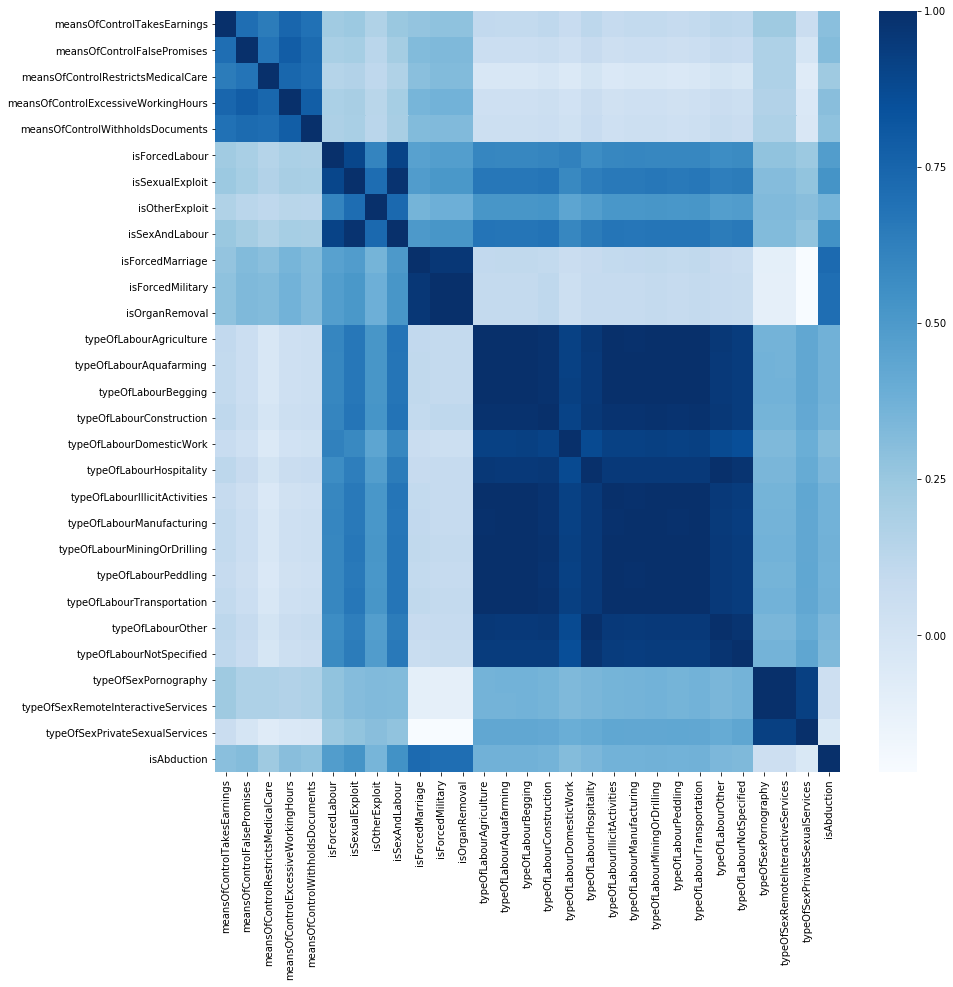

In [107]:
# calculate the correlation matrix
corr_short = X_short.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_short, ax=ax, xticklabels=corr_short.columns,
        yticklabels=corr_short.columns, cmap = 'Blues')
plt.show()

In [91]:
for i, col in enumerate(X_short.columns):
    print('VIF {}: {}'.format(col,variance_inflation_factor(X_short.values,i)))
    
## High VIF (5-10 or higher) indicates high correlation between column and one or more column(s)

VIF meansOfControlTakesEarnings: 33.08299284911666
VIF meansOfControlFalsePromises: 42.16426089250655
VIF meansOfControlRestrictsMedicalCare: 48.89253328006968
VIF meansOfControlExcessiveWorkingHours: 69.04002623079577
VIF meansOfControlWithholdsDocuments: 50.66570832527152
VIF isForcedLabour: 23.19478527143327
VIF isSexualExploit: 67.84841022379865
VIF isOtherExploit: 3.677026159244183
VIF isSexAndLabour: 115.10930005934976
VIF isForcedMarriage: 132.61369052577513
VIF isForcedMilitary: inf
VIF isOrganRemoval: inf
VIF typeOfLabourAgriculture: 816.6386428178574
VIF typeOfLabourAquafarming: 2323.461444931188
VIF typeOfLabourBegging: 1755980.0418762465
VIF typeOfLabourConstruction: 167.505984333108
VIF typeOfLabourDomesticWork: 27.409110425386853
VIF typeOfLabourHospitality: 345.3783713796714
VIF typeOfLabourIllicitActivities: 5023826.087712229
VIF typeOfLabourManufacturing: 291.66847595392284
VIF typeOfLabourMiningOrDrilling: inf
VIF typeOfLabourPeddling: 5022996.9539150195
VIF typeOfLab